# 로지스틱 회귀
* 분류에도 사용할 수 있는 회귀 알고리즘이 로지스틱 회귀 모델
* 샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용됨
* 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측함
* 스팸메일 분류기로 설명 가능

$$\hat{p}=h_\theta(x)=\sigma(\theta^Tx)$$
$$\sigma(t)=\frac{1}{1+exp(-t)} $$

![img](./img/img23.PNG)

$$\hat{y}=\begin{cases}0,\qquad \hat{p} \lt 0.5일때 \\
1, \qquad \hat{p} \geq 0.5일때
\end{cases}$$

## 훈련과 비용 함수
* 양성 샘플(y=1)에 대해서는 높은 확률(1에 가까운 값)을 추정, 확률이 높을 수록 비용(손실)=0에 가깝게 도출되고, 낮을수록 비용이 커짐
* 음성 샘플(y=0)에 대해서는 낮은 확률(0에 가까운 값)을 추정, 확률이 낮을 수록 비용(손실)=0에 가깝게 도출되고, 높을수록 비용이 커짐
$$\hat{y}=\begin{cases}-log(\hat{p}),\qquad y=1일때 \\
-log(1-\hat{p}), \qquad y=0일때
\end{cases}$$

* 비용함수
$$J(\theta) = -\frac{1}{m}\sum^m_{i=1}[y^{(i)}log(\hat{p}^{(i)})+ (1-y^{(i)})log(1-\hat{p}^{(i)})]$$

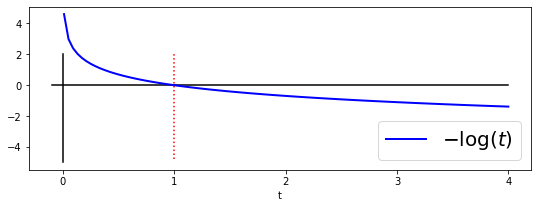

In [36]:
t = np.linspace(1e-2, 4, 100)
log_t = -np.log(t)
plt.figure(figsize=(9, 3))
plt.plot([0, 0], [-5, 2], "k-")
plt.plot([-0.1, 4], [0, 0], "k-")
plt.plot([1, 1], [-4.8, 2], "r:")

plt.plot(t, log_t, "b-", linewidth=2, label=r"$-\log(t)$")
plt.legend(loc="lower right", fontsize=20)
plt.xlabel("t")
plt.show()

## 결정 경계
![img](./img/img24.PNG)
붓꽃 데이터와 로지스틱 회귀를 이용하여 이진 분류기를 학습시키는 예제

* 사용 특성: 꽃잎의 너비(data 값의 3번 열에 해당)
* Iris-Versicolor 종인지 여부 판단(target 값의 1에 해당)

In [38]:
from sklearn import datasets
import numpy as np

iris =datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [39]:
X = iris["data"][:,3:] # 꽃잎의 너비
y = (iris["target"] ==2).astype(np.int) #Iris virginica이면 1 아니면 0

<ipython-input-39-b7f0af07a149>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] ==2).astype(np.int) #Iris virginica이면 1 아니면 0


In [40]:
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [41]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [42]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X,y)

LogisticRegression(random_state=42)

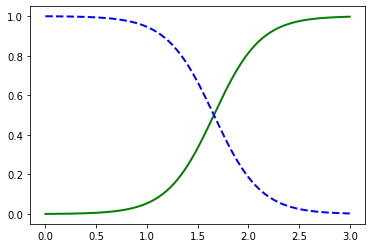

In [43]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

/home/dilab/anaconda3/lib/python3.8/site-packages/matplotlib/patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


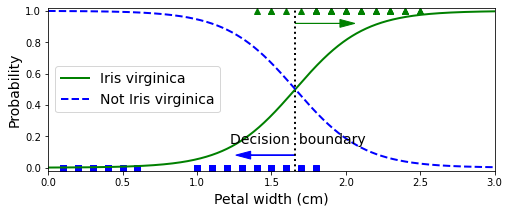

In [22]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [23]:
decision_boundary

array([1.66066066])

*  실제로 Iris-Virginica의 꽃잎 너비는 1.4에서 2.5cm 정도이다. 반면에 다른 두 붓꽃 품종은 꽃잎 너비가 0.1에서 1.8cm 정도이며, 따라서 약간 중첩되는 구간이 존재한다. 하지만 predict() 메서드는 단순히 결정 경계를 이용하여 클래스를 분류함

In [24]:
log_reg.predict([[1.67], [1.66]])

array([1, 0])

<ipython-input-30-017c95993969>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


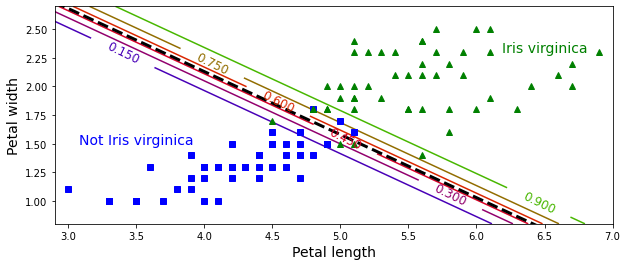

In [30]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42) 
#로지스틱 모델의 규제 강조를 조절하는데 C값을 활요함 C가 높을수록 규제 강도가 줄어듬
#추가적으로 패널티를 l1, l2로 주어서 규제할 수 있음
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## 소프트맥스 회귀
* 로지스틱 회귀 모델을 일반화하여 다중 클래스 분류를 지원하도록 한 것이 소프트맥스 회귀(softmax regression)
* 소프트맥스 회귀는 다항 로지스틱 회귀(multinomial loogistic regression)라고도 부름


샘플 별로 소프트맥스 점수를 계산한 후에 **소프트맥스 함수**(softmax function) $\sigma()$를 이용하여
각각의 클래스에 속할 확률 $\hat p_k$를 계산
* 1단계 : 소프트맥스 점수 계산

샘플 $\mathbf x$에 대해 $s_k(\mathbf x)$를 계산한다.

$$
s_k(\mathbf x) = (\theta^{(k)})^T\, \mathbf{x}
$$    

* 전체 클래스를 대상으로 하는 가중치 벡터들의 모음을 $\Theta$로 표기함
    $\Theta$는 (n, K) 모양의 행렬로 다루어진다.
    <br>
$$
\begin{bmatrix}
\theta^{(0)} &
\theta^{(1)} &
\cdots &
\theta^{(K-1)}
\end{bmatrix}
$$      

* 2단계 : 추정 확률 계산
$$
\hat p_k = \sigma(\mathbf s(\mathbf x))_k =
\frac{\exp(s_k(\mathbf x))}{\sum_{j=1}^{K}\exp(s_j(\mathbf x))}
$$
* 3단계 : 클래스 선택

$$
\hat y = 
\mathrm{argmax}_k \sigma(\mathbf s(\mathbf x))_k =
\mathrm{argmax}_k s_k(\mathbf x) =
\mathrm{argmax}_k ((\theta^{(k)})^T\, \mathbf{x}_b^T)
$$
* argmax연산은 함수를 최대화하는 변수의 값을 반환(해당 인덱스를 반환)

## 비용 함수
* 최적의 소프트맥스 회귀 모델을 경사 하강법을 이용하여 찾을 수 있음
* 학습 과정에 사용되는 비용 함수로는 다음과 같이 정의된 **크로스 엔트로피 비용 함수**를 사용
$$
J(\Theta) = 
- \frac{1}{m}\, \sum_{i=0}^{m-1}\sum_{k=0}^{K-1} y^{(i)}_k\, \log(\hat{p}_k^{(i)})
$$

## 예제

* 소프트맥스 회귀를 이용하여 붓꽃을 세 개의 클래스로 분류해보자.
* 사이킷런의 LogisticRegression 예측기의 multi_class 옵션 변수의 값으로 multinomial를 사용하면 소프트맥스 회귀를 사용할 수 있음

* `multi_class`: `auto`, `ovr`, `multinomial` 사용 가능. 기본값은 `auto`
    * `ovr`: 로지스틱 회귀의 이진 분류 기능을 일대다 전략을 활용하여 다중 클래스 분류 지원
    * `multinomial`: 다중 클래스 분류 지원
    * `auto`: 분류 방법에 따라 분류 모델 자동 선택
* `penalty`와 `C`에 대한 설명은 앞서 언급한 규제 로지스틱 회귀에 대한 설명과 동일

* 아래 코드는 꽃잎 길이와 너비를 이용하여 세 개의 클래스로 분류하는 소프트맥스 회귀 모델임


In [44]:
# 꽃잎 길이, 꽃잎 너비 정보는 `data` 키의 값에서 2번, 3번 열에 들어 있다.
X = iris["data"][:, (2, 3)]
# 타깃
y = iris["target"]

# 소프트맥스 회귀 모델 학습
softmax_reg = LogisticRegression(multi_class="multinomial",
                                 solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

$\Theta^T$의 0번 열을 제외한 클래스별 가중치 벡터로 이루어진 (K,n) 모양의 어레이가 해당함

In [49]:
softmax_reg.coef_ # 3x2의 크기로 출력 3클래스 2개 피처를 고려하기 때문

array([[-4.58614563, -2.24129385],
       [ 0.16068263, -2.15860167],
       [ 4.425463  ,  4.39989552]])

In [50]:
softmax_reg.intercept_

array([ 18.87514796,   6.3844344 , -25.25958236])

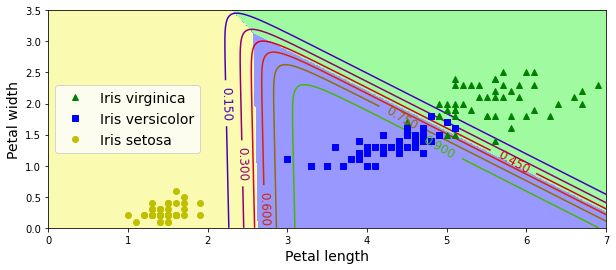

In [57]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [59]:
softmax_reg.predict([[2.6, 3]]) # 꽃잎의 길이가 2.6cm이고, 너비는 3cm인 붓꽃에 대한 예측은 Iris-Versicolor

array([1])

In [60]:
softmax_reg.predict_proba([[2.6, 3]])

array([[0.39029691, 0.43096385, 0.17873924]])

# 서포트벡터머신
* 매우 강력하고 선형이나 비선형 분류, 회귀, 이상치 탐색에 사용할 수있는 다목적 머신러닝 모델임
* SVM은 특히 복잡한 분류 문제에 잘 들어맞으며 작거나 중간 크기의 데이터셋에 적합함

## 선형 SVM 분류
![image](./img/img25.PNG)

In [64]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# 붓꽃 데이터셋 불러오기
iris = datasets.load_iris()
# 꽃잎 길이와 너비 속성만 훈련 세트로 활용
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
# Iris virginica 품종이면 양성, 아니면 음성. 즉, 이진 분류용으로 설정.
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

# 전처리
scaler = StandardScaler()
X=scaler.fit_transform(X)
#모델 생성
svc=LinearSVC(C=1, random_state=42)
#모델 학습
svc.fit(X,y)
#샘플의 레이블 예측
svc.predict([[5.5, 1.7]])

array([1.])

* 왼편 그래프: 결정 경계 도로폭이 넓음, 덜 정교한 분류 가능
* 오른편 그래프: 결정 경계 도로폭이 좁음, 정교한 분류 가능 
![img](./img/img26.PNG)



## 비선형 분류
* 선형 SVM + 다항 회귀: 4장에서 배운대로 다항 특성을 추가한 후 선형 SVM 적용.
* SVC + 커널 트릭: 새로운 특성을 실제고 추가하지 않지만, 동일한 결과를 유도하는 방식
![img](./img/img27.PNG)

### Linear + 다항회귀 예제

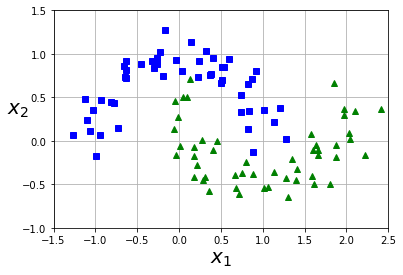

In [86]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42) #n_samples: 샘플수, noise: 잡음의 표준 편차

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

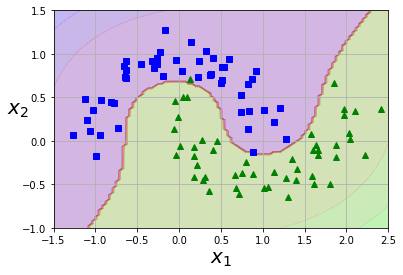

In [88]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# 3차 다항까지 추가
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, random_state=42))
    ])

# 학습
polynomial_svm_clf.fit(X, y)

# 그래프 그리는 함수
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### SVC + 커널 트릭


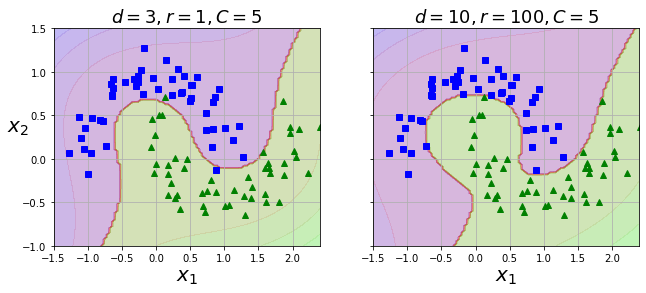

In [91]:
from sklearn.svm import SVC

# 다항식 커널 지정
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) #kernel: 다항식 커널 지정, degree: 3차 
        #coef0: 높은 차수에 영향을 주는 정도, C=5 마진은 약간 크게
    ])
poly_kernel_svm_clf.fit(X, y)

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5)) #kernel: 다항식 커널 지정, degree: 10차 
        #coef0: 높은 차수에 영향을 주는 정도크게, C=5 마진은 약간 크게
    ])
poly100_kernel_svm_clf.fit(X, y)

# 그래프 그리기
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

# 왼편 그래프
plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

# 오른편 그래프
plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")
plt.show()

# SVM 회귀
* SVM 알고리즘을 약간 응용하면 선형, 비선형 회귀에서 사용가능함
    * SVM 분류: 마진 위반 발생 정도를 조절하면서 두 클래스 사이의 도로 폭(마진)을 최대한 넓게 하기
    * SVM 회귀: 마진 위반 발생 정도를 조절하면서 도로 폭(마진)을 최대한 넓혀서 도로 위에 가능한 많은 샘플 포함하기
* 회귀 모델에서 마진 위반은 도로 밖에 위치한 샘플을 나타냄

## 선형 SVM 회귀
* 아래 코드는 `LinearSVR` 선형 SVM 회귀 모델을 이용하는 방법임
* 두 개의 그래프는 서로 다른 마진이 사용될 때의 차이를 잘 보여줌

* 왼편 그래프 마진: $\epsilon=1.5$의 두 배
* 오른편 그래프 마진: $\epsilon=1.5$의 두 배

In [112]:
# LinearSVR 클래스 지정
from sklearn.svm import LinearSVR

# 훈련 세트 무작위 생성
# 레이블은 선형으로 지정 + 가우시안 잡음
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

# 두 개의 LinearSVR 예측기 구성

# epsilon: 1.5 또는 0.5
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

# 서포트 벡터 확인
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

# 2개의 SVM객체에 서포트 벡터 속성 저장
svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)
# epsilon(마진) 크기 양방향 화살표 표기 위치 지정
eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

In [130]:
# 그래프 그리는 함수
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1) #0~2까지 x값 100개를 생성
    y_pred = svm_reg.predict(x1s) #그 값을 기반으로 예측갑 생성
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$") #x1s와 예측값으로 회귀 직선하나 그림(결정 경계 중심)
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--") #엡실론만큼 결정경계 양수로 이동
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--") #엡신론만큼 결정경제 음수로 이동
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")  #실제 값 할당
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

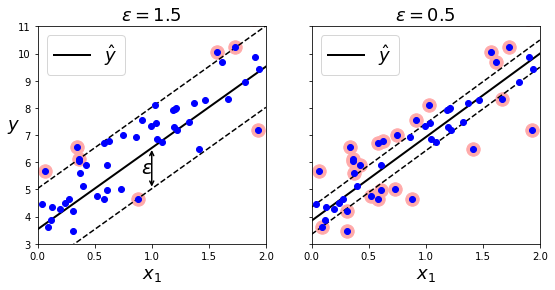

In [131]:
# 그래프 그리기
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

# 왼편 그래프
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

# 마진 양방향 화살표 표기
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)

# 오른편 그래프
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

# 비선형 SVM 회귀

* 왼편 그래프 규제: `C=100`
    * 가중치 벡터에 대한 규제가 약해짐.
    * 보다 정교한 회귀 모델 구현
* 오른편 그래프 규제: `C=0.01`
    * 가중치 벡터에 대한 규제가 강해짐.
    * 덜 정교한 회귀 모델 구현


In [144]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [145]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

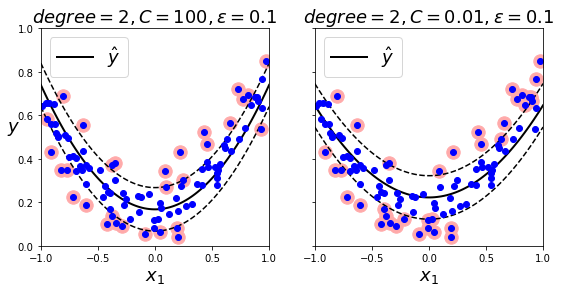

In [146]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

# 왼편 그래프 그리기
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

# 오른편 그래프 그리기
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()